Here we will evaluate the direction and sensitivity of different parameter regions. 

In [1]:
import os
import sys
sys.path.append('/u/vasulkar/p_emodnet_amey/Regional_canada_model/')
path1=sys.path[-1]
print(path1)
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cpf 
from matplotlib import cm

/u/vasulkar/p_emodnet_amey/Regional_canada_model/


Let us start with bathymetry and then go to bottom friction.


In [2]:
typ='bathymetry'
runsfolder=os.path.join(path1,'model_runs','snellius_runs','OpenDAruns')
print(runsfolder)
simfolder=runsfolder+'/Canadamodel_bathy_sensitivity/'


/u/vasulkar/p_emodnet_amey/Regional_canada_model/model_runs/snellius_runs/OpenDAruns


In [3]:
import pandas as pd

# simfolder=runsfolder+'/vis_9para_32TG_model/'
resfile=simfolder+'results_dud.csv'
df=pd.read_csv(resfile,delimiter='\t',quotechar="'")
df.head()

,Iteration Cost,depth_1,depth_2,depth_3,depth_4,depth_5,depth_6,depth_7,depth_8,depth_9,...,depth_116,depth_117,depth_118,depth_119,depth_120,depth_121,depth_122,depth_123,depth_124,depth_125
1,4.959790e+07,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.959458e+07,0.05,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.956171e+07,0.00,0.05,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.955549e+07,0.00,0.00,0.05,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.957426e+07,0.00,0.00,0.00,0.05,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
Nparams=125 #no. of domains.
key=df.keys()
costfuncvec=np.array(df[key[0]])
standardcf=costfuncvec[0]
#0.05 is bathymetry sensitivity.
if typ=='bathymetry':
    dh=0.05
else:
    dh=0.2
sencfvec=(costfuncvec[1:]-standardcf)/standardcf


In [5]:
import xarray as xr
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point, MultiPolygon, shape
import shapefile

import cartopy.crs as ccrs
import cartopy.feature as cpf 
from global_land_mask import globe
import pandas as pd

In [6]:
#getting the polygons.
# Load polygon from disc
import pickle
with open('/u/vasulkar/p_emodnet_amey/Regional_canada_model/model_development/Openda_models/parampolygons', "rb") as poly_file:
    loaded_polygons = pickle.load(poly_file)

In [11]:
#reading parameter file
fname='/u/vasulkar/p_emodnet_amey/Regional_canada_model/model_development/Openda_models/densepara_correction_template.xyz'
headerlist=["Lon","Lat","Val"]
pardf=pd.read_csv(fname,delim_whitespace=True,names=headerlist)
parlonvec=pardf['Lon']
parlatvec=pardf['Lat']
paramid=pardf['Val']



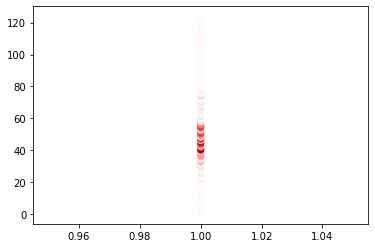

In [7]:
#getting a color map based on sensitivity
ax_a = plt.scatter(np.ones(len(sencfvec)),range(len(sencfvec)),c=sencfvec,cmap=cm.seismic,vmin=-0.05,vmax=0.05)

/tmp/ipykernel_10322/2206477454.py:22: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(ax_a)


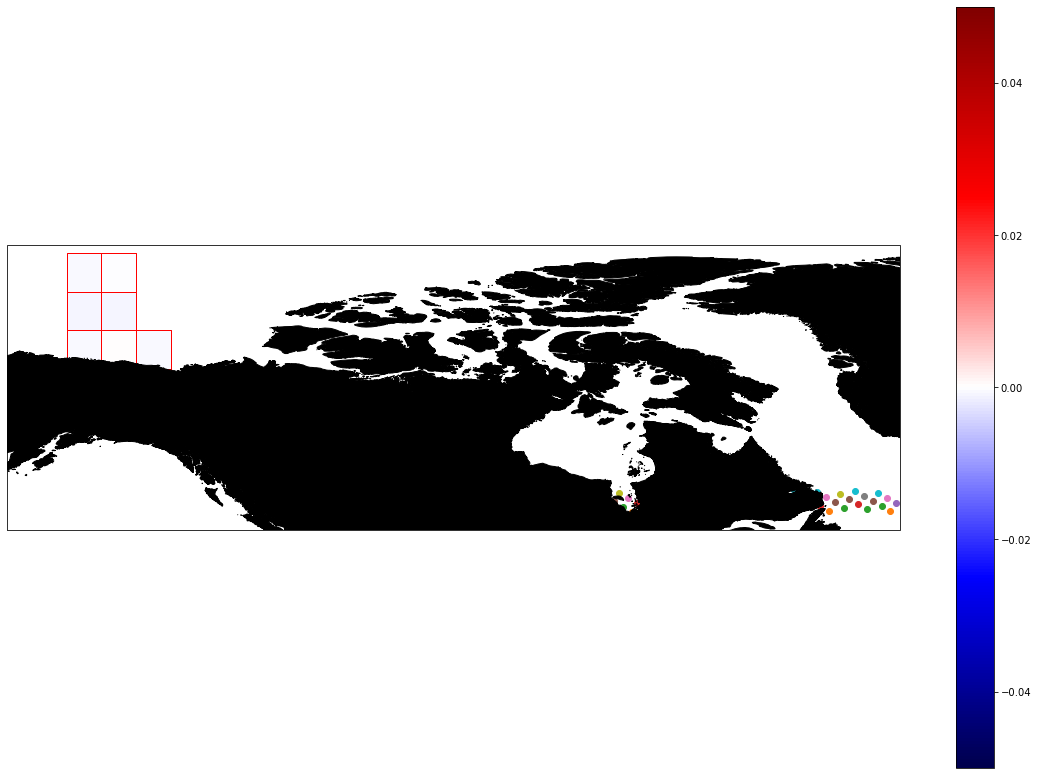

In [13]:
# marking the x-axis and y-axis  

fig=plt.figure(figsize=(20, 14), frameon=True)
# proj=ccrs.NorthPolarStereo(central_longitude=0.0,true_scale_latitude=None, globe=None)
proj=ccrs.PlateCarree()
ax1=fig.add_subplot(1,1,1,projection=proj) 
ax1.set_extent((-158, -46, 49, 84.7), crs=ccrs.PlateCarree())
# ax1.set_extent((-60, -55, 49, 84), crs=ccrs.PlateCarree())

for i in list(loaded_polygons.keys())[:10]:
    ax1.add_geometries([loaded_polygons[i]],crs=ccrs.PlateCarree(),edgecolor='red',facecolor=ax_a.get_facecolors()[i-1],label=i)
    x=loaded_polygons[i].centroid.x
    y=loaded_polygons[i].centroid.y
    #ax1.fill(x,y,)
    # ax1.text(x, y, keys, color='red', size=15, ha='center', va='center', transform=ccrs.PlateCarree())
    #getting points in polygon. from paramid.
    indparam=np.where(paramid==i)[0]
    # print(vec)
    ax1.scatter(parlonvec[indparam],parlatvec[indparam],transform=ccrs.PlateCarree(),label=str(i))

# ax1.legend()
fig.colorbar(ax_a)
feature=cpf.GSHHSFeature(scale='i',levels=[1],facecolor='black',alpha=1)
ax1.add_feature(feature)
    
plt.show()
    

In [ ]:
plt.GridSpec.

In [20]:
ax1.G

<GeoAxesSubplot:>

In [11]:
sencfvec

array([-6.63009381e+04, -7.23871142e+05, -8.48122553e+05, -4.72678108e+05,
       -6.79652899e+03,  1.11348938e+05, -8.84249036e+05, -1.63383708e+05,
       -3.33789586e+05, -4.05953029e+05, -7.68715102e+04,  3.04211160e+04,
       -2.26658588e+05, -1.51508974e+06,  3.61873334e+05, -1.02676443e+06,
        3.22923159e+05, -1.96506070e+05,  4.75531104e+05,  7.36877632e+05,
       -9.49621511e+04,  8.42303193e+05,  1.68329637e+06,  5.80068656e+05,
        3.26391493e+04,  2.19540747e+06,  1.65195153e+06,  1.28407080e+06,
        2.01549633e+05,  3.54218583e+06,  2.16313893e+06, -9.66187779e+05,
        2.12835637e+06,  9.73193992e+06,  2.02640158e+06,  2.76890446e+06,
        1.01127653e+07,  9.57926710e+06,  1.14384779e+07,  3.36577327e+06,
        3.64783724e+07,  5.72363025e+07,  7.39717963e+06,  1.02301029e+07,
        2.06565490e+07,  3.19856537e+07,  6.38339910e+06,  2.65431860e+07,
        3.04944539e+06,  6.15460783e+06,  1.69888997e+07,  2.05060828e+07,
        9.45801616e+06,  